In [40]:
import plotly.express as px
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [41]:
heart = pd.read_csv("Data/heart.csv")

In [42]:
row_to_drop = [449]
heart.drop(row_to_drop, axis= 0, inplace= True)

In [43]:
heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [44]:
pd.concat([heart, pd.get_dummies(heart['RestingECG'])], axis = 1)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,LVH,Normal,ST
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,0,1,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,0,1,0
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,0,0,1
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,0,1,0
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1,0,1,0
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1,0,1,0
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1,0,1,0
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1,1,0,0


In [45]:
heart['HeartDisease'] = heart['HeartDisease'].astype('category')
heart.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 917 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Age             917 non-null    int64   
 1   Sex             917 non-null    object  
 2   ChestPainType   917 non-null    object  
 3   RestingBP       917 non-null    int64   
 4   Cholesterol     917 non-null    int64   
 5   FastingBS       917 non-null    int64   
 6   RestingECG      917 non-null    object  
 7   MaxHR           917 non-null    int64   
 8   ExerciseAngina  917 non-null    object  
 9   Oldpeak         917 non-null    float64 
 10  ST_Slope        917 non-null    object  
 11  HeartDisease    917 non-null    category
dtypes: category(1), float64(1), int64(5), object(5)
memory usage: 87.0+ KB


In [46]:
heart_update = pd.get_dummies(heart, columns = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'])

In [47]:
heart_update.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1


In [48]:
target = heart_update['HeartDisease']

In [49]:
input_columns = heart_update.loc[:, heart_update.columns != 'HeartDisease']

In [50]:
import sklearn
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(input_columns, target, test_size=0.2, random_state = 42)

In [51]:
x_train.shape

(733, 20)

In [52]:
print(y_train)
print(y_test)

795    0
25     0
84     1
10     0
344    1
      ..
106    0
270    0
861    1
435    0
102    1
Name: HeartDisease, Length: 733, dtype: category
Categories (2, int64): [0, 1]
669    0
30     1
377    1
536    1
807    0
      ..
211    1
746    1
585    1
878    0
452    1
Name: HeartDisease, Length: 184, dtype: category
Categories (2, int64): [0, 1]


In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
my_RFC = RandomForestClassifier()

In [68]:
parameters = {'max_depth':[50, 80, 100],  'max_features': [2, 3, 4], 'min_samples_split': [1, 2, 3], 'n_estimators': [100, 200, 300], 'criterion': ['gini', 'entropy', 'log_loss']}
grid = GridSearchCV(my_RFC, parameters)

grid.fit(x_train, y_train)
grid.best_params_

/projects/f8b69746-629d-4592-8f76-5d11b6fd6282/miniconda3/envs/ds_env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
405 fits failed out of a total of 1215.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
405 fits failed with the following error:
Traceback (most recent call last):
  File "/projects/f8b69746-629d-4592-8f76-5d11b6fd6282/miniconda3/envs/ds_env/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/projects/f8b69746-629d-4592-8f76-5d11b6fd6282/miniconda3/envs/ds_env/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 476, in fit
    trees = Parallel(
  File "/projects/f8b

{'criterion': 'gini',
 'max_depth': 100,
 'max_features': 2,
 'min_samples_split': 3,
 'n_estimators': 200}

In [74]:
y_hat = grid.predict(x_test)

<AxesSubplot:>

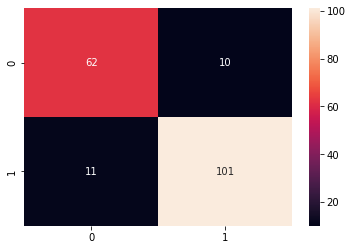

In [70]:
# new random forest
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_hat), annot=True, fmt='g')

In [71]:
from sklearn.metrics import accuracy_score, recall_score, f1_score
accuracy_score(y_test, y_hat)

0.8858695652173914

In [72]:
recall_score(y_test, y_hat)

0.9017857142857143

In [73]:
f1_score(y_test, y_hat)

0.905829596412556

In [56]:
# fit your model
my_RFC.fit(x_train, y_train)

RandomForestClassifier()

In [202]:
# predictions
y_hat = my_RFC.predict(x_test)
y_hat

array([0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1])

In [204]:
np.array(y_test)

array([0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1])

In [203]:
# evaluations
total_squared_error = (np.sum((y_test - y_hat)**2))
mean_squared_error = total_squared_error/len(y_test)
print(mean_squared_error)

0.13043478260869565


<AxesSubplot:>

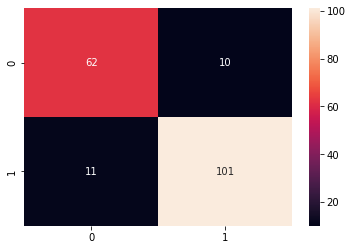

In [75]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_hat), annot=True, fmt='g')

In [76]:
from sklearn.metrics import accuracy_score, recall_score, f1_score

In [77]:
accuracy_score(y_test, y_hat)

0.8858695652173914

In [78]:
recall_score(y_test, y_hat)

0.9017857142857143

In [79]:
f1_score(y_test, y_hat)

0.905829596412556